In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from fbprophet import Prophet

In [3]:
df=pd.read_csv('Miles_Traveled.csv')

In [4]:
df

,DATE,TRFVOLUSM227NFWA
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0
...,...,...
583,2018-08-01,286608.0
584,2018-09-01,260595.0
585,2018-10-01,282174.0
586,2018-11-01,258590.0


In [5]:
df.columns=['ds','y']

In [6]:
df

,ds,y
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0
...,...,...
583,2018-08-01,286608.0
584,2018-09-01,260595.0
585,2018-10-01,282174.0
586,2018-11-01,258590.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      588 non-null    object 
 1   y       588 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB


In [8]:
df['ds']=pd.to_datetime(df['ds'])

<AxesSubplot:xlabel='ds'>

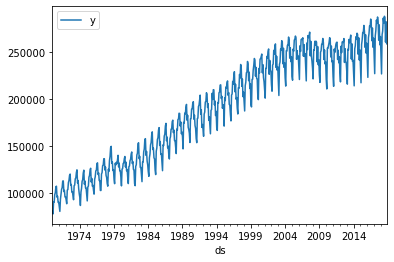

In [11]:
df.plot(x='ds',y='y')

In [12]:
len(df)

588

In [13]:
train=df.iloc[:-12]
test=df.iloc[-12:]

In [14]:
len(train)

576

In [16]:
m=Prophet()

In [17]:
m.fit(train)

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [18]:
forecast=m.make_future_dataframe(periods=12,freq='MS')

In [19]:
results=m.predict(forecast)

In [20]:
results

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1970-01-01,94181.559784,69479.567529,81588.581999,94181.559784,94181.559784,-18599.797646,-18599.797646,-18599.797646,-18599.797646,-18599.797646,-18599.797646,0.0,0.0,0.0,75581.762139
1,1970-02-01,94493.496722,61483.561620,72874.971609,94493.496722,94493.496722,-27108.834612,-27108.834612,-27108.834612,-27108.834612,-27108.834612,-27108.834612,0.0,0.0,0.0,67384.662111
2,1970-03-01,94775.246215,89043.735920,100662.679563,94775.246215,94775.246215,-36.299658,-36.299658,-36.299658,-36.299658,-36.299658,-36.299658,0.0,0.0,0.0,94738.946557
3,1970-04-01,95087.183153,89439.598476,101046.460284,95087.183153,95087.183153,27.606045,27.606045,27.606045,27.606045,27.606045,27.606045,0.0,0.0,0.0,95114.789197
4,1970-05-01,95389.057609,99298.944756,110995.846388,95389.057609,95389.057609,9610.744015,9610.744015,9610.744015,9610.744015,9610.744015,9610.744015,0.0,0.0,0.0,104999.801624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,2018-08-01,263557.251253,274371.072672,285387.865037,263504.153726,263619.447220,16443.515456,16443.515456,16443.515456,16443.515456,16443.515456,16443.515456,0.0,0.0,0.0,280000.766709
584,2018-09-01,263701.749361,256018.315226,267539.076327,263623.245804,263803.839664,-1675.833952,-1675.833952,-1675.833952,-1675.833952,-1675.833952,-1675.833952,0.0,0.0,0.0,262025.915409
585,2018-10-01,263841.586239,263005.355787,274813.268197,263728.549684,263982.854266,5293.167898,5293.167898,5293.167898,5293.167898,5293.167898,5293.167898,0.0,0.0,0.0,269134.754137
586,2018-11-01,263986.084347,250751.820554,261652.605614,263830.519868,264175.216214,-8218.559465,-8218.559465,-8218.559465,-8218.559465,-8218.559465,-8218.559465,0.0,0.0,0.0,255767.524882


<AxesSubplot:xlabel='ds'>

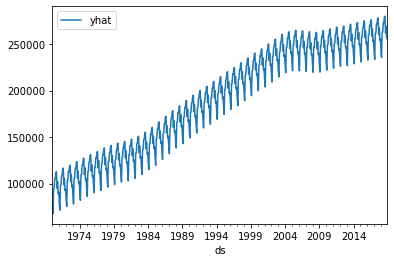

In [22]:
results.plot(x='ds',y='yhat')

<AxesSubplot:xlabel='ds'>

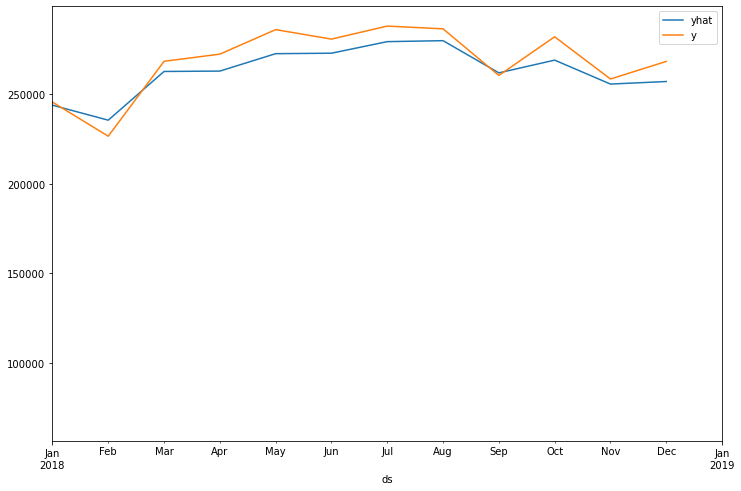

In [25]:
ax=results.plot(x='ds',y='yhat',legend=True,figsize=(12,8))
test.plot(x='ds',y='y',legend=True,ax=ax,figsize=(12,8),xlim=('2018-01-01','2019-01-01'))

In [26]:
from statsmodels.tools.eval_measures import rmse

In [29]:
pred=results['yhat'].iloc[-12:]

In [32]:
test['y']

576    245695.0
577    226660.0
578    268480.0
579    272475.0
580    286164.0
581    280877.0
582    288145.0
583    286608.0
584    260595.0
585    282174.0
586    258590.0
587    268413.0
Name: y, dtype: float64

In [33]:
rmse(test['y'],pred)

8524.084735454997

In [35]:
test['y'].mean()

268739.6666666667

In [36]:
from fbprophet.diagnostics import cross_validation,performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [37]:
intial=5*365
intial=str(intial)+' days'

In [38]:
intial

'1825 days'

In [39]:
period=5*365
period=str(period)+' days'

In [40]:
horizon=365
horizon=str(horizon)+' days'

In [42]:
df_cv=cross_validation(m,horizon=horizon,period=period,initial=intial)

INFO:fbprophet:Making 9 forecasts with cutoffs between 1976-12-11 00:00:00 and 2016-12-01 00:00:00


In [47]:
train.head()

,ds,y
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


In [48]:
train.tail()

,ds,y
571,2017-08-01,283184.0
572,2017-09-01,262673.0
573,2017-10-01,278937.0
574,2017-11-01,257712.0
575,2017-12-01,266535.0


In [46]:
train.tail()

,ds,y
571,2017-08-01,283184.0
572,2017-09-01,262673.0
573,2017-10-01,278937.0
574,2017-11-01,257712.0
575,2017-12-01,266535.0


In [49]:
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,52 days,2.440480e+07,4940.121674,4543.226142,0.027839,0.023430,0.4
1,53 days,2.189073e+07,4678.753115,4275.518107,0.025071,0.023430,0.4
2,54 days,1.845424e+07,4295.839617,3751.881988,0.020184,0.022341,0.5
3,55 days,2.353986e+07,4851.789757,4286.500962,0.023332,0.023430,0.4
4,57 days,2.121071e+07,4605.508636,4011.466093,0.021541,0.022341,0.5
...,...,...,...,...,...,...,...
94,360 days,1.844636e+07,4294.922982,3768.283191,0.019668,0.019608,0.5
95,361 days,1.755041e+07,4189.321092,3487.275332,0.018267,0.019006,0.5
96,362 days,3.171401e+07,5631.519540,4404.117322,0.022028,0.024617,0.4
97,364 days,3.002471e+07,5479.480904,4245.018294,0.021435,0.021653,0.5


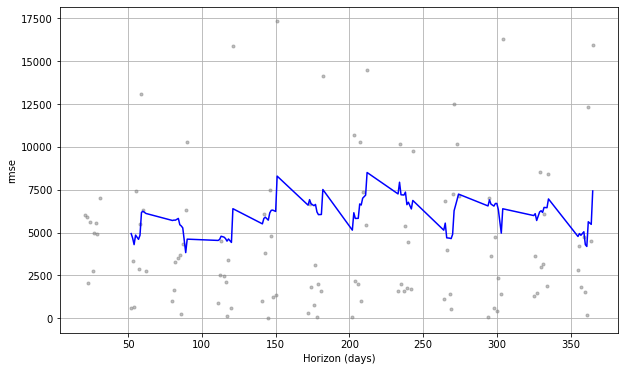

In [53]:
plot_cross_validation_metric(df_cv,metric='rmse');